In [2]:
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from typing import List, Optional, Tuple

In [3]:
production = numpy.array([21465,30536,23480,18712,12667,5011,3773,10662,10182,8409,7379,6243,5964,5307,4945,4483,4813,4111,3954,3590,3590,3181,3175,3041,2708,2355,1870,1584,1820,1628,2035,1812,1796,1573,1608,1563,1530,1513,1420,1609,1205,1224,1457,1300,1313,1174,1202,1202,1096,1178,1018])

# Core functions

In [4]:
def arps(qi, Di, b, t):
    """ARPS equation
        qi: Initial production (>0)
        Di: Initial decline rate (% >0)
        b: Constant (between 0 and 2)
        t: Month number (1 to n)
    """
    if b == 0:
        return qi * numpy.exp(-Di * t)
    elif b == 1.0:
        return qi / (1.0 + Di * t)
    else:
        return (qi / (1.0 + b * Di * t) ** (1.0 / b))

def error(params, production):
    prediction = numpy.array([int(arps(*params, x)) for x in range(1, len(production)+1)])
#     return numpy.sum((forecast - production) ** 2)
    return numpy.square(numpy.subtract(production, prediction)).mean() 

# TARGET VALUES

In [10]:
qi = 25090.2861212654
Di = 0.162129072364027
b = 0.485530087902886
e = error((qi, Di, b), production) # Actual expected error
e

5975026.960784313

# Predictions

In [11]:
f = numpy.array([int(arps(qi, Di, b, x)) for x in range(1, len(production)+1)])
f

array([21464, 18566, 16213, 14277, 12666, 11310, 10160,  9175,  8325,
        7588,  6943,  6377,  5876,  5432,  5036,  4681,  4362,  4075,
        3814,  3578,  3363,  3166,  2986,  2821,  2669,  2529,  2399,
        2280,  2168,  2065,  1969,  1879,  1796,  1717,  1644,  1575,
        1510,  1450,  1393,  1339,  1288,  1240,  1194,  1151,  1111,
        1072,  1035,  1001,   967,   936,   906])

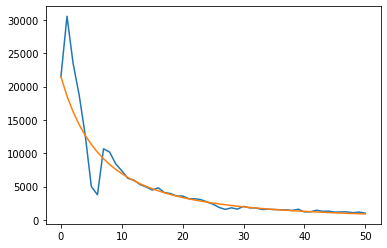

In [12]:
plt.plot(production)
plt.plot(f)

# NEED HELP HERE

In [14]:
_DI: float = 1.0 # nominal annual decline
_B = 1.5
INITIAL_GUESS = numpy.array([numpy.max(production), _DI, _B])
_FIT_BOUNDS: List[Tuple[Optional[float], Optional[float]]] = [
    (0.0, None), # initial rate
    (0.0, None), # nominal annual decline
    (0.0, 2.0),  # b
]

In [15]:
fit = minimize(fun=error, x0=INITIAL_GUESS, args=production, method='L-BFGS-B', bounds=_FIT_BOUNDS)
fit

      fun: 15508504.0
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([3.0536e+04, 1.0000e+00, 1.5000e+00])

# I expect x to be [25090, 0.162, 0.486] or whereabouts